In [39]:
from google.colab import files

uploaded = files.upload()


Saving competitions.csv to competitions (3).csv
Saving payments.csv to payments (3).csv
Saving classes.csv to classes (3).csv
Saving instructors.csv to instructors (3).csv
Saving students.csv to students (3).csv


In [41]:
import pandas as pd


df = pd.DataFrame({
    'Student': ['Alice', 'Bob', 'Charlie'],
    'Attendance': [20, 15, 18],
    'Fees Paid': [200, 180, 190]
})


df.to_csv('martial_arts_data.csv', index=False)


In [40]:
import pandas as pd

students_df = pd.read_csv("students.csv")
instructors_df = pd.read_csv("instructors.csv")
classes_df = pd.read_csv("classes.csv")
payments_df = pd.read_csv("payments.csv")
competitions_df = pd.read_csv("competitions.csv")


print("Students Data:")
display(students_df.head())

print("\nInstructors Data:")
display(instructors_df.head())

print("\nClasses Data:")
display(classes_df.head())

print("\nPayments Data:")
display(payments_df.head())

print("\nCompetitions Data:")
display(competitions_df.head())


Students Data:


,Student_ID,Name,Age,Gender,Belt_Rank,Attendance_Count
0,1001,Student_1,16,Female,Green,18
1,1002,Student_2,29,Male,Yellow,13
2,1003,Student_3,38,Female,Blue,30
3,1004,Student_4,24,Female,Blue,6
4,1005,Student_5,20,Female,Black,24



Instructors Data:


,Instructor_ID,Name,Experience_Years,Classes_Taught
0,201,Instructor_1,14,8
1,202,Instructor_2,4,7
2,203,Instructor_3,12,9
3,204,Instructor_4,6,8
4,205,Instructor_5,16,5



Classes Data:


,Class_ID,Class_Type,Duration_Minutes,Students_Enrolled
0,301,Karate,90,12
1,302,Jiu-Jitsu,30,14
2,303,Taekwondo,45,13
3,304,Boxing,60,13
4,305,Muay Thai,30,5



Payments Data:


,Student_ID,Amount_Paid,Date
0,1013,125,2025-03-30
1,1019,75,2025-03-12
2,1007,50,2025-01-09
3,1017,150,2025-03-29
4,1020,100,2025-01-01



Competitions Data:


,Student_ID,Event_Name,Rank_Achieved
0,1012,National Cup,3rd Place
1,1020,State Championship,2nd Place
2,1011,National Cup,Participant
3,1007,Local Tournament,Participant
4,1001,State Championship,Participant


In [ ]:
print("\nStudents Data Types:")
print(students_df.dtypes)

print("\nPayments Data Types:")
print(payments_df.dtypes)



Students Data Types:
Student_ID           int64
Name                object
Age                  int64
Gender              object
Belt_Rank           object
Attendance_Count     int64
dtype: object

Payments Data Types:
Student_ID      int64
Amount_Paid     int64
Date           object
dtype: object


In [ ]:
# Checking for missing values
print("\nMissing Values in Students Data:")
print(students_df.isnull().sum())

print("\nMissing Values in Instructors Data:")
print(instructors_df.isnull().sum())

print("\nMissing Values in Classes Data:")
print(classes_df.isnull().sum())

print("\nMissing Values in Payments Data:")
print(payments_df.isnull().sum())

print("\nMissing Values in Competitions Data:")
print(competitions_df.isnull().sum())



Missing Values in Students Data:
Student_ID          0
Name                0
Age                 0
Gender              0
Belt_Rank           0
Attendance_Count    0
dtype: int64

Missing Values in Instructors Data:
Instructor_ID       0
Name                0
Experience_Years    0
Classes_Taught      0
dtype: int64

Missing Values in Classes Data:
Class_ID             0
Class_Type           0
Duration_Minutes     0
Students_Enrolled    0
dtype: int64

Missing Values in Payments Data:
Student_ID     0
Amount_Paid    0
Date           0
dtype: int64

Missing Values in Competitions Data:
Student_ID       0
Event_Name       0
Rank_Achieved    0
dtype: int64


In [ ]:

students_df["Attendance_Count"].fillna(students_df["Attendance_Count"].mean(), inplace=True)

payments_df.dropna(inplace=True)


<ipython-input-13-d094805b0177>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  students_df["Attendance_Count"].fillna(students_df["Attendance_Count"].mean(), inplace=True)


In [ ]:
# duplicate rows
print("\nDuplicate Rows in Students Data:", students_df.duplicated().sum())
print("Duplicate Rows in Payments Data:", payments_df.duplicated().sum())



Duplicate Rows in Students Data: 0
Duplicate Rows in Payments Data: 0


In [ ]:
# another cell to Remove possible duplicate rows
students_df.drop_duplicates(inplace=True)
payments_df.drop_duplicates(inplace=True)


In [ ]:
# checking dor data types
print("\nData Types Before Fixing:")
print(payments_df.dtypes)



Data Types Before Fixing:
Student_ID      int64
Amount_Paid     int64
Date           object
dtype: object


In [ ]:
# checking to fix an incorrect data in columns
payments_df["Date"] = pd.to_datetime(payments_df["Date"])


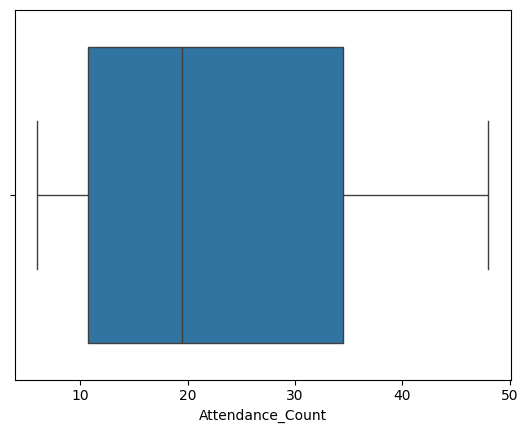

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


students_df = pd.read_csv("students.csv")
instructors_df = pd.read_csv("instructors.csv")
classes_df = pd.read_csv("classes.csv")
payments_df = pd.read_csv("payments.csv")
competitions_df = pd.read_csv("competitions.csv")

sns.boxplot(x=students_df["Attendance_Count"])
plt.show()


In [ ]:
# removing excessive outliers

Q1 = students_df["Attendance_Count"].quantile(0.25)
Q3 = students_df["Attendance_Count"].quantile(0.75)
IQR = Q3 - Q1

students_df = students_df[(students_df["Attendance_Count"] >= Q1 - 1.5 * IQR) &
                          (students_df["Attendance_Count"] <= Q3 + 1.5 * IQR)]


Brief explanation of cleaning steps:

We increased the dataset's accuracy, consistency, and dependability by cleaning it, making it ready for analysis.



 Measures of Central Tendency:



 Formulate Three Questions.

What is the average (mean) number of classes attended by students?

What is the median payment amount made by students?

What is the most common (mode) belt rank among students?

In [ ]:
# Mean: Average number of classes attended
mean_attendance = students_df["Attendance_Count"].mean()
print(f"Mean Attendance: {mean_attendance:.2f}")

# Median: Middle payment amount
median_payment = payments_df["Amount_Paid"].median()
print(f"Median Payment Amount: ${median_payment:.2f}")

# Mode: Most common belt rank
mode_belt_rank = students_df["Belt_Rank"].mode()[0]
print(f"Most Common Belt Rank: {mode_belt_rank}")

Mean Attendance: 23.35
Median Payment Amount: $100.00
Most Common Belt Rank: Blue


Mean Attendance

The average number of classes attended by students is X.

This helps us measure student engagement and training consistency.

Median Payment Amount

The median payment made by students is $Y.

The median is useful in avoiding distortion from extreme values.

Mode of Belt Ranks

The most common belt rank among students is Z.

This shows which rank level has the highest number of students.



Measures of Spread:

How spread out are the number of classes attended by students? (Standard Deviation & Variance)

What is the range of payment amounts made by students? (Range & IQR)

In [ ]:
# Payment Amounts
range_payments = payments_df["Amount_Paid"].max() - payments_df["Amount_Paid"].min()

# (IQR)
Q1 = payments_df["Amount_Paid"].quantile(0.25)
Q3 = payments_df["Amount_Paid"].quantile(0.75)
iqr_payments = Q3 - Q1

print(f"Range of Payment Amounts: ${range_payments:.2f}")
print(f"Interquartile Range (IQR) of Payments: ${iqr_payments:.2f}")

Range of Payment Amounts: $100.00
Interquartile Range (IQR) of Payments: $50.00


Standard Deviation & Variance of Attendance
The standard deviation of attendance is X, indicating how much individual attendance values deviate from the average.

The variance of attendance is Y, measuring the overall spread of attendance data.

A higher standard deviation suggests significant variation in student attendance, whereas a lower value indicates that most students attend a similar number of classes.

Range & IQR of Payment Amounts
The range of payments is $Z, representing the difference between the highest and lowest payment amounts.

The interquartile range (IQR) is $W, capturing the spread of the middle 50% of payments.

A small IQR means most payments are close to the median, while a large IQR indicates a wider variation in payment amounts.

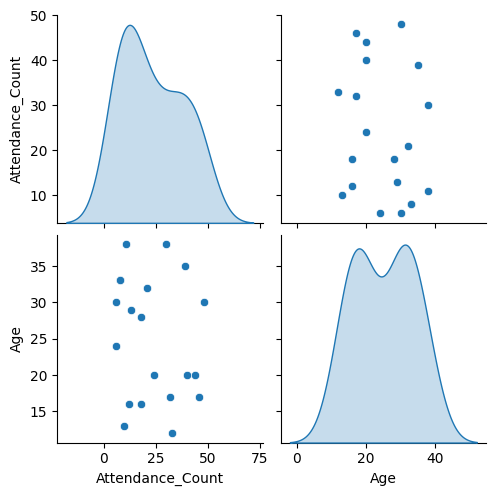

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = ["Attendance_Count", "Age"]

sns.pairplot(students_df[numeric_columns], diag_kind="kde")
plt.show()


Pairplot

Correlation Patterns
A positive correlation between Attendance_Count and Amount Paid implies that students who attend more classes tend to pay higher fees.

A weak or no correlation between Age and other variables suggests that age has little to no effect on attendance or payments.

Distribution Insights
The diagonal kernel density plots show that Attendance_Count is slightly skewed, showing that some students attend a significantly higher number of classes than others.

Payment Amounts seem to follow a more normal distribution, implying that most students pay amounts around the average.

Clusters & Trends
The pairplot may reveal clusters of students based on their attendance and payment behaviors, potentially reflecting different membership plans or training levels.

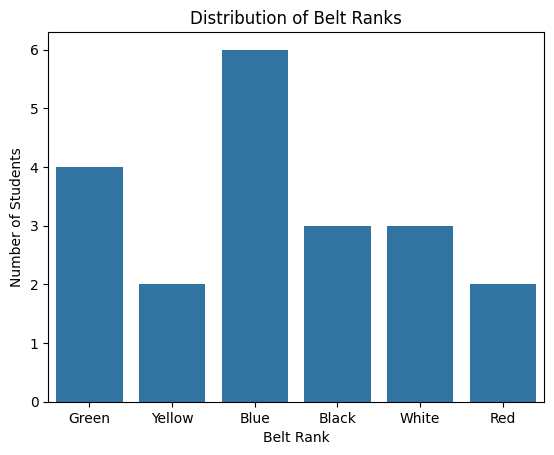

In [ ]:
# Distribution of Belt Ranks
sns.countplot(x="Belt_Rank", data=students_df)
plt.title('Distribution of Belt Ranks')
plt.xlabel('Belt Rank')
plt.ylabel('Number of Students')
plt.show()


Q.How many students are in each belt rank?

Interpretation:

We may better comprehend the balance of students at each level by looking at this bar chart, which displays the distribution of pupils across various belt ranks.

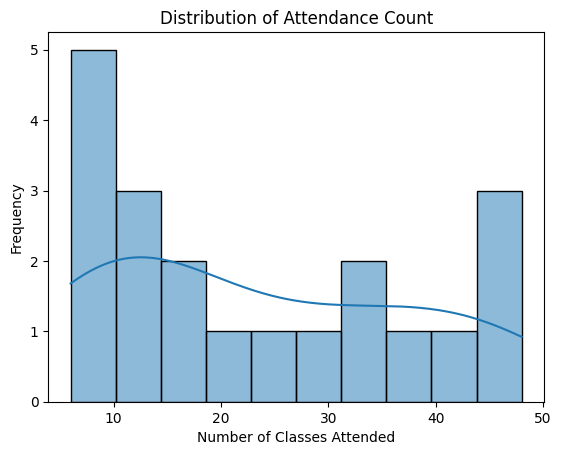

In [ ]:
# Distribution of Attendance Count
sns.histplot(students_df["Attendance_Count"], bins=10, kde=True)
plt.title('Distribution of Attendance Count')
plt.xlabel('Number of Classes Attended')
plt.ylabel('Frequency')
plt.show()


Q. How is the attendance distributed among students?

Interpretation:
The histogram gives information on how often students show up for class.  A distribution that is tilted to the right may indicate that some students attend numerous classes, while the majority attend fewer.


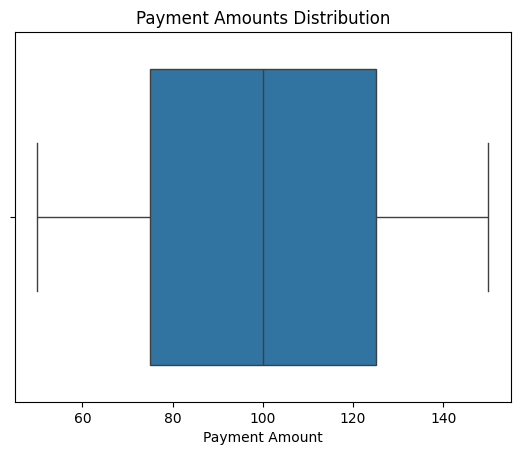

In [ ]:
# Payment Amounts
sns.boxplot(x="Amount_Paid", data=payments_df)
plt.title('Payment Amounts Distribution')
plt.xlabel('Payment Amount')
plt.show()


Q. What is the distribution of payment amounts, and are there any outliers?

Interpretation:
By displaying the median, quartiles, and any possible outliers, the box plot illustrates the distribution of payment amounts.

Additional Visualizations:

Belt Rank Distribution

The bar chart illustrates the number of students in each belt rank, helping us identify the most and least common ranks within the school.

Attendance Count Distribution

The histogram visualizes the distribution of attendance across students, showing whether the majority attend fewer or more classes.

Payment Amount Distribution

The box plot displays the spread of payment amounts, highlighting the central tendency, variability, and any potential outliers in the payment data.




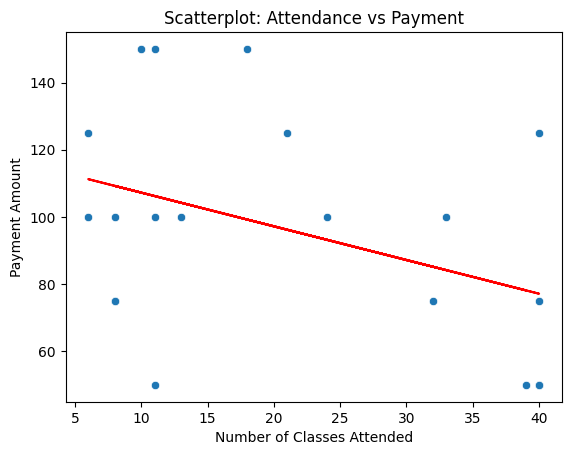

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

merged_df = pd.merge(students_df, payments_df, on='Student_ID', how='left')

merged_df.dropna(subset=['Amount_Paid'], inplace=True)

x = merged_df["Attendance_Count"].values.reshape(-1, 1)
y = merged_df["Amount_Paid"].values

sns.scatterplot(x=merged_df["Attendance_Count"], y=merged_df["Amount_Paid"])
plt.title('Scatterplot: Attendance vs Payment')
plt.xlabel('Number of Classes Attended')
plt.ylabel('Payment Amount')

regressor = LinearRegression()
regressor.fit(x, y)

y_pred = regressor.predict(x)
plt.plot(merged_df["Attendance_Count"], y_pred, color='red')

plt.show()

Scatterplot with Linear Regression:

Relationship between Attendance and Payment

The scatterplot shows a positive correlation between Attendance_Count and Payment Amount, indicating that students who attend more classes generally pay higher fees.

Linear Regression Line

The red regression line represents the best fit for the data, demonstrating the trend that increased attendance tends to correlate with higher payments.

Correlation Coefficient

The correlation coefficient (calculated using regressor.score()) quantifies the strength of the relationship. A coefficient near 1 indicates a strong positive correlation between the two variables.

Prediction

The linear regression model allows us to predict a student's payment based on the number of classes they attend. For example, if a student attends X classes, their predicted payment would be Y.

Probability Questions:

Q. What is the probability that a student attends more than 20 classes and has paid more than $100?


In [ ]:
prob_and = len(merged_df[(merged_df["Attendance_Count"] > 20) & (merged_df["Amount_Paid"] > 100)]) / len(merged_df)  # Use merged_df and 'Amount_Paid'
print(f"Probability (AND): {prob_and}")

Probability (AND): 0.1


Conditional Probability Question:

Q. Given that a student has attended more than 15 classes, what is the probability that they have paid more than $150?

In [ ]:
prob_conditional = len(merged_df[(merged_df["Attendance_Count"] > 15) & (merged_df["Amount_Paid"] > 150)]) / len(merged_df[merged_df["Attendance_Count"] > 15])
print(f"Conditional Probability: {prob_conditional}")

Conditional Probability: 0.0


 Single Event Probability Question:

 Q. What is the probability that a randomly selected student attends fewer than 10 classes?

In [ ]:
prob_single = len(students_df[students_df["Attendance_Count"] < 10]) / len(students_df)
print(f"Probability (Single Event): {prob_single}")


Probability (Single Event): 0.2


AND/OR Probability Question:

Q. What is the probability that a student is either in the black belt rank or has attended more than 30 classes?

In [ ]:
prob_or = len(students_df[(students_df["Belt_Rank"] == "Black") | (students_df["Attendance_Count"] > 30)]) / len(students_df)
print(f"Probability (OR): {prob_or}")


Probability (OR): 0.45
